# Funciones de distribución de probabilidades
## Distribución Uniforme

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([ 99974.,  99405., 100011., 100184.,  99841., 100522., 100455.,
         99476., 100175.,  99957.]),
 array([ 1.00026366, 10.90022707, 20.80019049, 30.70015391, 40.60011732,
        50.50008074, 60.40004415, 70.30000757, 80.19997098, 90.0999344 ,
        99.99989781]),
 <BarContainer object of 10 artists>)

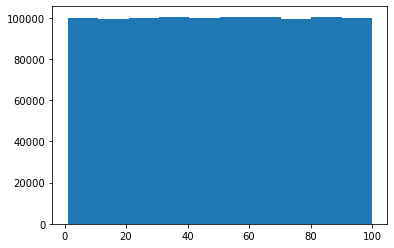

In [3]:
plt.hist(data)

In [4]:
data = np.random.randn(100)

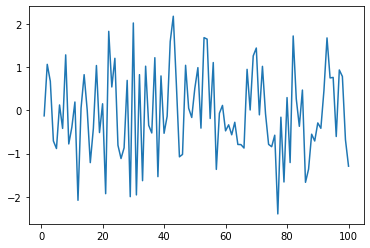

In [5]:
x = range(1,101)
plt.plot(x,data)
#plt.hist(np.random.normal(0,1,10000),bins=30)

(array([9.0000e+00, 1.2000e+01, 3.1000e+01, 7.4000e+01, 1.9400e+02,
        3.7100e+02, 6.8800e+02, 1.3180e+03, 2.3360e+03, 3.5140e+03,
        4.9920e+03, 6.9790e+03, 8.6880e+03, 1.0052e+04, 1.0484e+04,
        1.0884e+04, 1.0071e+04, 8.7990e+03, 6.8300e+03, 5.0400e+03,
        3.5290e+03, 2.3250e+03, 1.3860e+03, 7.2200e+02, 3.9500e+02,
        1.6300e+02, 7.0000e+01, 2.8000e+01, 1.0000e+01, 6.0000e+00]),
 array([-4.12975356, -3.85476665, -3.57977974, -3.30479283, -3.02980593,
        -2.75481902, -2.47983211, -2.2048452 , -1.92985829, -1.65487138,
        -1.37988447, -1.10489756, -0.82991065, -0.55492374, -0.27993683,
        -0.00494992,  0.27003699,  0.54502389,  0.8200108 ,  1.09499771,
         1.36998462,  1.64497153,  1.91995844,  2.19494535,  2.46993226,
         2.74491917,  3.01990608,  3.29489299,  3.5698799 ,  3.84486681,
         4.11985371]),
 <BarContainer object of 30 artists>)

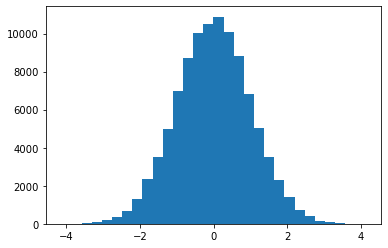

In [6]:
data = np.random.randn(100000)
plt.hist(data,bins=30)

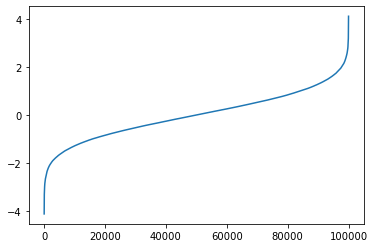

In [7]:
x = range(1,100001)
plt.plot(x,sorted(data))

(array([  23.,  187.,  801., 1981., 2831., 2399., 1305.,  405.,   63.,
           5.]),
 array([-3.15658642, -1.32249946,  0.5115875 ,  2.34567446,  4.17976142,
         6.01384838,  7.84793534,  9.6820223 , 11.51610926, 13.35019622,
        15.18428318]),
 <BarContainer object of 10 artists>)

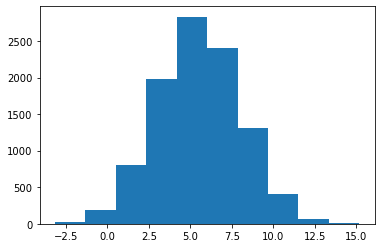

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[ 1.05746952, -1.26380044,  0.9468576 , -0.92601622],
       [-0.40345026,  0.34582109, -0.74401616,  0.00221108]])

### La simulación de Monte Carlo

* Generamos dos números aleatorios x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $x^2$ + $y^2$

    * Si el valor es inferior a 1 -> estamos dentro del círculo.
    * Si el valor es superior a 1 -> estamos fuera del círculo.

* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de pi.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de pi.

In [26]:
def pi_montecarlo(n,n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]**2 + y[j]**2)
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    
    pi = pi_avg / n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi,fig)

3.1526000000000005


(3.1526000000000005, [<matplotlib.lines.Line2D at 0x20c15ef3070>])

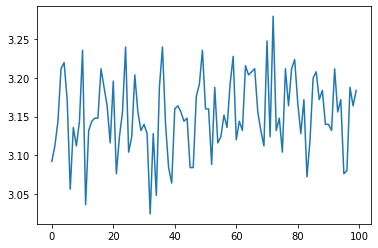

In [30]:
pi_montecarlo(n = 1000,n_exp = 100)

### Dummy Data Sets

In [37]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(5,32,n)
    }
)

In [38]:
data.head()

,A,B,C
0,0.208831,-3.775436,15.065954
1,0.487552,0.739409,5.230503
2,1.304256,4.624827,13.273933
3,-0.693419,0.175752,18.808691
4,-0.901220,-3.005156,5.163665


In [39]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001328,1.496477,18.491608
std,1.000160,2.498284,7.788583
min,-4.736496,-10.222212,5.000049
25%,-0.675568,-0.188562,11.753142
50%,-0.001578,1.495379,18.494640
75%,0.673480,3.184378,25.226829
max,4.832237,13.664528,31.999973


(array([6.80000e+01, 2.31500e+03, 2.86750e+04, 1.51298e+05, 3.37436e+05,
        3.23035e+05, 1.32422e+05, 2.30250e+04, 1.66300e+03, 6.30000e+01]),
 array([-4.73649567, -3.77962243, -2.8227492 , -1.86587596, -0.90900272,
         0.04787051,  1.00474375,  1.96161698,  2.91849022,  3.87536346,
         4.83223669]),
 <BarContainer object of 10 artists>)

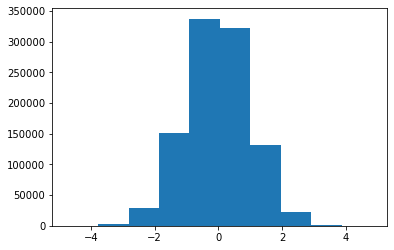

In [40]:
plt.hist(data["A"])

(array([9.80000e+01, 2.66000e+03, 3.15350e+04, 1.58979e+05, 3.42622e+05,
        3.16422e+05, 1.25157e+05, 2.10290e+04, 1.45300e+03, 4.50000e+01]),
 array([-10.22221186,  -7.83353784,  -5.44486381,  -3.05618978,
         -0.66751575,   1.72115828,   4.10983231,   6.49850634,
          8.88718037,  11.2758544 ,  13.66452843]),
 <BarContainer object of 10 artists>)

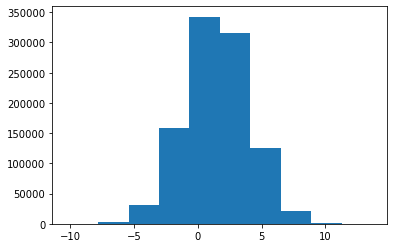

In [41]:
plt.hist(data["B"])

(array([100344.,  99198., 100476., 100544.,  99669., 100299., 100059.,
        100121.,  99738.,  99552.]),
 array([ 5.00004899,  7.70004142, 10.40003384, 13.10002627, 15.8000187 ,
        18.50001112, 21.20000355, 23.89999598, 26.5999884 , 29.29998083,
        31.99997326]),
 <BarContainer object of 10 artists>)

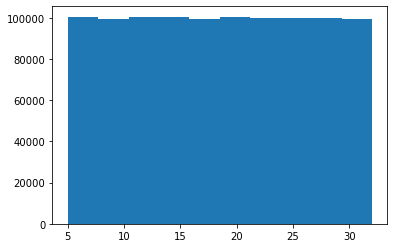

In [42]:
plt.hist(data["C"])

In [43]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [44]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [45]:
column_names = data.columns.values.tolist()

In [46]:
a = len(column_names)
a

21

In [49]:
new_data = pd.DataFrame({
    'Column Name': column_names,
    'A': np.random.randn(a),
    'B': np.random.uniform(0,1,a)
}, index = range(42, 42 + a))

In [50]:
new_data

,Column Name,A,B
42,State,-0.174558,0.209295
43,Account Length,0.114099,0.613686
44,Area Code,-0.404464,0.092616
45,Phone,1.012041,0.960645
46,Int'l Plan,0.088748,0.099798
47,VMail Plan,-0.531411,0.919885
48,VMail Message,-1.768719,0.780666
49,Day Mins,-0.297470,0.020612
50,Day Calls,0.493821,0.075753
51,Day Charge,0.116682,0.021996
